<a href="https://colab.research.google.com/github/MarshallVielmetti/AlertAIMonorepo/blob/main/Face_Mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
!pip install mediapipe
import mediapipe as mp
import math
import time
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# cap = cv2.VideoCapture(0)
# pTime = 0

# mpDraw = mp.solutions.drawing_utils
# mpFaceMesh = mp.solutions.face_mesh
# faceMesh = mpFaceMesh.FaceMesh(max_num_faces=1)
# drawSpec = mpDraw.DrawingSpec(thickness=2, circle_radius=1)

# while True:
#   success, img = cap.read()
#   imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#   results = faceMesh.process(imgRGB)
#   if results.multi_face_landmarks:
#     for faceLms in results.multi_face_landmarks:
#       mpDraw.draw_landmarks(image=img,
#                             landmark_list=faceLms,
#                             connections=mpFaceMesh.FACE_CONNECTIONS,
#                             landmark_drawing_spec=drawSpec,
#                             connection_drawing_spec=drawSpec)
#   cTime = time.time()
#   fps = 1 / (cTime - pTime)
#   pTime = cTime
#   cv2.putText(img, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), 3)
#   cv2.imshow("Facial Landmark Mesh: Camera Feed", img)
#   cv2.waitKey(1)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving slanted focus.jpg to slanted focus (2).jpg


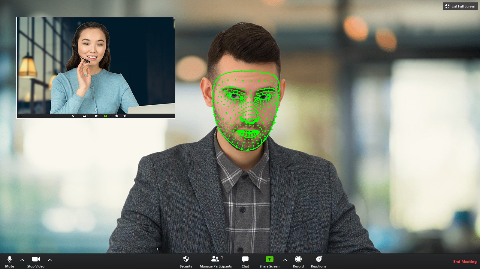

In [ ]:
mpDraw = mp.solutions.drawing_utils
mpFaceMesh = mp.solutions.face_mesh
faceMesh = mpFaceMesh.FaceMesh(max_num_faces=1)
drawSpec = mpDraw.DrawingSpec(thickness=2, circle_radius=1)

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)
  # plt.axis('off')
  # plt.imshow(img)
  # plt.show()

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for filename, image in images.items():
  # testing_img_path = r''
  # img = cv2.imread(testing_img_path)
  imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results = faceMesh.process(imgRGB)
  if results.multi_face_landmarks:
    for faceLms in results.multi_face_landmarks:
      mpDraw.draw_landmarks(image=image,
                            landmark_list=faceLms,
                            connections=mpFaceMesh.FACE_CONNECTIONS,
                            landmark_drawing_spec=drawSpec,
                            connection_drawing_spec=drawSpec)

      # for id, lm in enumerate(faceLms.landmark):
        # print(lm)
        # ih, iw, ic = img.shape
        # x, y = int(lm.x * iw), int(lm.y * ih)
        # print(id, x, y)
  # plt.title('Facial Landmark Mesh: Camera Feed')
  # plt.imshow(image)
  # plt.show()
  # print(filename)
  resize_and_show(image)